# Requirements

In [3]:
import cv2
import os
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


# Load & Display Image

<function matplotlib.pyplot.show(close=None, block=None)>

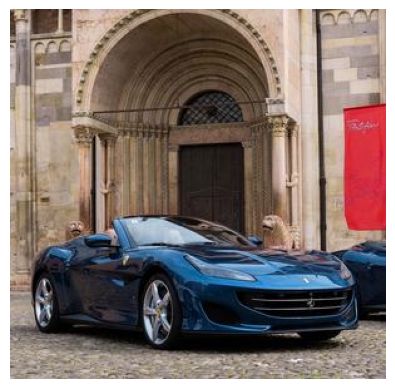

In [6]:
# image address
image_address = os.path.join("images", "car.jpg")

# read the image file
image = cv2.imread(image_address)

# convert channels from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# dispaly
plt.imshow(image)
plt.axis('off')
plt.show
# TODO

# Creating Sketch

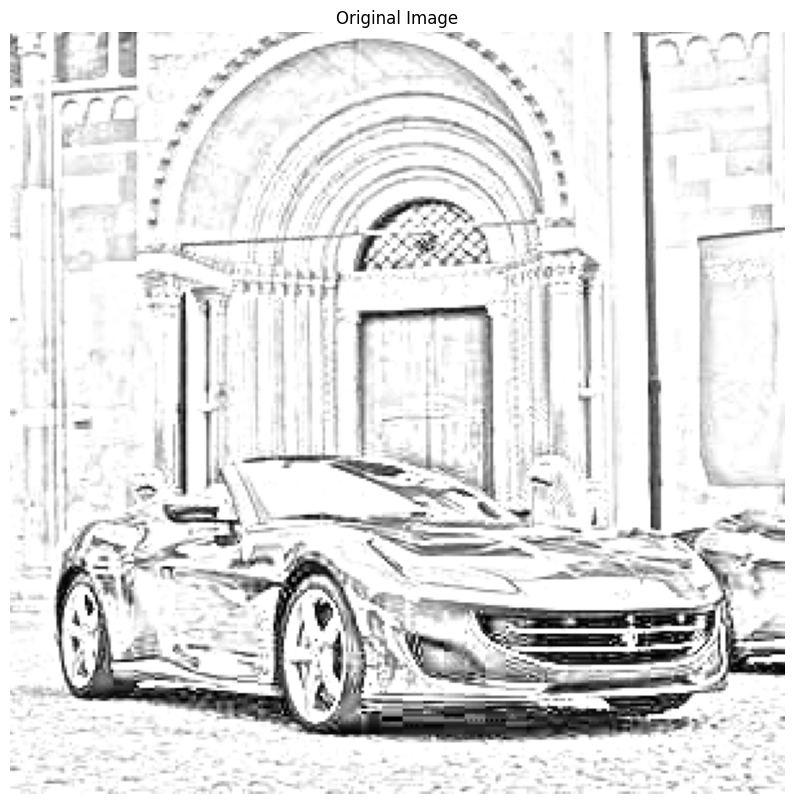

In [7]:
# Convert the input image from BGR to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Invert the grayscale image (i.e., produce a negative of the grayscale image)
inverted_image = 255 - gray_image

# Apply Gaussian blur to the inverted image with a kernel size of 21x21
blur_image = cv2.GaussianBlur(inverted_image, (21,21), 0)

# Invert the blurred image to produce a semi-transparent effect
inverted_blur = 255 - blur_image

# Divide the grayscale image by the inverted blurred image to produce the sketch effect
sketch = cv2.divide(gray_image, inverted_blur, scale=256)

# display
plt.figure(figsize=(10, 10))
plt.imshow(sketch, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()

In [8]:
# Create a function that takes an RGB image and outputs sketched image.
def sketch_image(rgb_image):
    
    gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
    inverted_image = 255 - gray_image
    blur_image = cv2.GaussianBlur(inverted_image, (21, 21), 0)
    inverted_blur = 255 - blur_image
    sketch = cv2.divide(gray_image, inverted_blur, scale=256.0)

    return sketch



# Sketching WebCam Video Stream in Real-time


In [5]:
# Based on the the function you created, write a script to convert stream of frames from webcam into sketched frame.
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    sketched_frame = sketch_image(rgb_frame)
    cv2.imshow("Webcam Sketch", sketched_frame)

    if cv2.waitKey(33) == 27:
        break

cap.release()
cv2.destroyAllWindows()

When we put the 0 argument, it opens the defult camera(webcam).
until the 'ESC' key is not pressed, this function will convert each frame to sketch using the defined function and show it.

Note that the parts in which the size of the window gets defined in the test code is factored out here for simplicity and it uses the defult values for them.

# Sketching a Video in Real-time


In [4]:
# Do the same thing for external video.
cap = cv2.VideoCapture('Einstein_1.mp4')

while True:
    ret, frame = cap.read()

    if not ret:
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    sketched_frame = sketch_image(rgb_frame)
    cv2.imshow("Webcam Sketch", sketched_frame)

    if cv2.waitKey(33) == 27:
        break

cap.release()
cv2.destroyAllWindows()

Instead of the defult camer, the path to video should be passed to cv2.VideoCapture function.

Project Description:

In this project, a function is written to convert a frame to sketch by doing the following steps:
1. The image is converted to grayscale
2. Then it is inverted
3. A gussian filter with 21*21 kernel size is applied to it.
4. It is inverted again.
5. At last, the grayscale image in divided by the inverted image.

Then this function is used to convert the frames from webcan or videos to sketch.